# ONE:

## 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [15]:
import pandas as pd
import string
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [32]:
elon=pd.read_csv("F:/ExcelR workings/Assignments/Text Mining/Elon_musk.csv",encoding='latin-1')

In [33]:
elon.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [34]:
# Drop the column
elon.drop(['Unnamed: 0'], axis=1, inplace=True)

In [35]:
elon=[Text.strip() for Text in elon.Text] # Remove both the leading and the trailing characters.
elon=[Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False

In [36]:
elon[0:20]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [41]:
# Tokenization
sentences=sent_tokenize(''.join(elon))
sentences

['@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!',
 '!Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJo

In [58]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanjaysagar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjaysagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanjaysagar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
from nltk.stem import WordNetLemmatizer
import re

In [48]:
wordnet = nltk.stem.WordNetLemmatizer()

## Cleaning

In [56]:
filtered_split=[]
for i in range(len(sentences)):
    review = re.sub("[^A-Za-z" "]+"," ",sentences[i])
    review = re.sub("[0-9" "]+"," ",sentences[i])
    review = re.sub(r'[^\w]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered_split.append(review)

In [57]:
filtered_split

['kunalb11 alien id_aa_carmack ray tracing cyberpunk hdr next level',
 'tried',
 'joerogan spotify great interview',
 'gtera27 doge underestimated teslacn congratulation tesla china amazing execution last year',
 'next even',
 'happy new year ox',
 'http co 9wfkmyu2ojfrodo underdoge thought would fail',
 'http co zgxjfdzzrm owensparks_ flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed',
 'tweet definitely represent real world time allocation entertaining outcome likely givedirectly sent somejust agree clubhouse kanyewesthttps co 3rwe9uhsts geoffkeighley unrealengine getting realbought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u 0001f923 u 0001f923 true power haha http co fc9uhqsd7o freewalletorg crypto wallet give private key avoided cost freewalletorg app sucksrt spacex nasa selected falcon heavy launch first two element lunar gateway together one mission',
 'http c

In [60]:
len(filtered_split)

859

In [61]:
sent_df = pd.DataFrame(filtered_split, columns=['sentence'])
sent_df

,sentence
0,kunalb11 alien id_aa_carmack ray tracing cyber...
1,tried
2,joerogan spotify great interview
3,gtera27 doge underestimated teslacn congratula...
4,next even
...,...
854,everything ever sensed thought http co b3zxd38...
855,kenyanwalstreet actually payout vesting stock ...
856,may never pay stock b http co 8zg37stxt9 ihear...
857,detail aug 28 ai symbiosis u wait vistacruiser...


## Sentiment Analysis Using Affin Dataset

In [62]:
afinn=pd.read_csv('F:/ExcelR workings/python/Afinn.csv', sep=',', encoding=('latin-1'))

In [63]:
affinity_scores=afinn.set_index('word')['value'].to_dict()

In [64]:
nlp = spacy.load('en_core_web_sm')

## Calculation of sentiment

In [65]:
# Custom function: score each word in a sentence in lemmatised form,
# but calculate the score for the whole orignal sentence.
sentiment_lexicon=affinity_scores

def calculate_sentiment(text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+= sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [67]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [69]:
# how many words are in the sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1     1
2     4
3    11
4     2
5     4
6     7
7    11
8    77
9    24
Name: word_count, dtype: int64

In [70]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
824,primarily electrical electronic chip design ht...,-7,70
59,also road hell mostly paved bad intention,-7,7
606,ba http co tjsh1exz1q justpaulinelol embarrass...,-6,46
450,play poor inventor card rich along amp invente...,-5,24
573,static fire checkout static fire fly 60 000 ft...,-4,11
...,...,...,...
604,http co ixhyt6nuic teslarati tesla germany des...,13,54
551,open area http co rabjkrtqlw savedtesla peterd...,14,100
99,erdayastronaut spacex also thinking spacex boc...,16,64
671,observed http co mezrzcnewo universal_sci pret...,18,61


In [71]:
sent_df['index']=range(0,len(sent_df))

In [75]:
sent_df

,sentence,sentiment_value,word_count,index
0,kunalb11 alien id_aa_carmack ray tracing cyber...,0,9,0
1,tried,0,1,1
2,joerogan spotify great interview,3,4,2
3,gtera27 doge underestimated teslacn congratula...,5,11,3
4,next even,0,2,4
...,...,...,...,...
854,everything ever sensed thought http co b3zxd38...,2,13,854
855,kenyanwalstreet actually payout vesting stock ...,0,6,855
856,may never pay stock b http co 8zg37stxt9 ihear...,-3,19,856
857,detail aug 28 ai symbiosis u wait vistacruiser...,-2,33,857


### Assigning sentiment class

In [108]:
sentiment = []
for i in range(len(sent_df)):
  c = sent_df.iloc[i]['sentiment_value']
  if c>0:
    sentiment.append("+ve")
  elif c<0:
    sentiment.append("-ve")
  else:
    sentiment.append("Neutral")
sent_df['Sentiment']=sentiment
sent_df

,sentence,sentiment_value,word_count,index,Sentiment
0,kunalb11 alien id_aa_carmack ray tracing cyber...,0,9,0,Neutral
1,tried,0,1,1,Neutral
2,joerogan spotify great interview,3,4,2,+ve
3,gtera27 doge underestimated teslacn congratula...,5,11,3,+ve
4,next even,0,2,4,Neutral
...,...,...,...,...,...
854,everything ever sensed thought http co b3zxd38...,2,13,854,+ve
855,kenyanwalstreet actually payout vesting stock ...,0,6,855,Neutral
856,may never pay stock b http co 8zg37stxt9 ihear...,-3,19,856,-ve
857,detail aug 28 ai symbiosis u wait vistacruiser...,-2,33,857,-ve


# Ploting for comparisons

<AxesSubplot:>

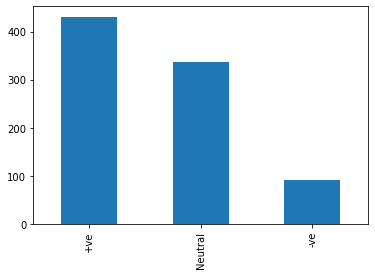

In [109]:
sent_df['Sentiment'].value_counts().plot(kind='bar')

C:\Users\sanjaysagar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

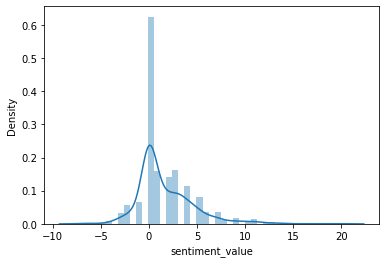

In [72]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

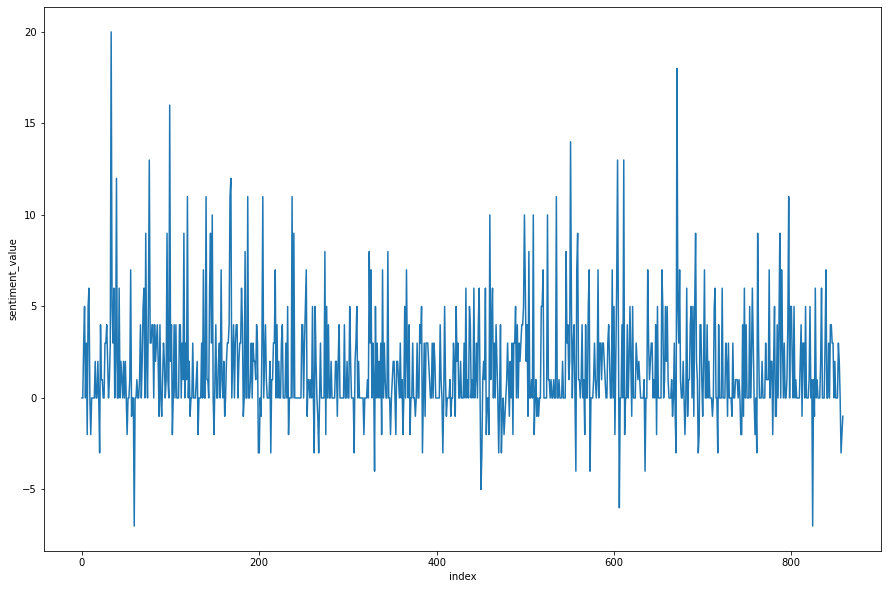

In [73]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

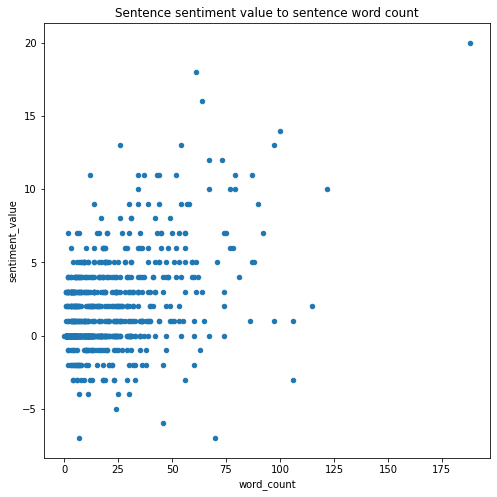

In [76]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')